<a href="https://colab.research.google.com/github/pranay4712/datascience/blob/main/7assignment_2q.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Performing Clustering (Hierarchical, Kmeans & DBSCAN) for the Airlines data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
airline=pd.read_csv('/content/EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [4]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [6]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [7]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
airline2_norm=StandardScaler().fit_transform(airline)
airline2_norm

array([[-1.73512503e+00, -4.51140783e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-1.73426342e+00, -5.39456874e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-1.73340181e+00, -3.20031232e-01, -1.86298687e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [ 1.72682006e+00, -4.29480975e-05, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [ 1.72768167e+00, -1.85606976e-01, -1.86298687e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [ 1.72854328e+00, -7.00507951e-01, -1.86298687e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [8]:
# DBSCAN Clustering
dbscan=DBSCAN(eps=1,min_samples=4)
dbscan.fit(airline2_norm)

DBSCAN(eps=1, min_samples=4)

In [9]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [10]:
# Adding clusters to dataset
airline2['clusters']=dbscan.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [11]:
airline2.groupby('clusters').agg(['mean']).reset_index()

,clusters,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,-1,177646.939292,899.406408,2.701518,1.062395,1.082631,39019.816189,21.784148,2120.370995,6.134907,4652.507589,0.686341
1,0,53148.905529,2.084023,1.660427,1.000000,1.000000,9033.232477,8.449717,116.498041,0.380932,3811.440139,0.000000
2,1,61006.745987,5.796034,2.605288,1.000000,1.000000,22850.425873,12.799811,245.526912,0.761095,4513.312559,1.000000
3,2,35251.500000,1058.750000,1.000000,1.000000,1.000000,1297.500000,1.250000,0.000000,0.000000,5047.250000,0.000000
4,3,65419.714286,0.000000,1.000000,1.000000,1.000000,6984.000000,11.571429,2905.571429,9.142857,5171.857143,1.000000
5,4,60932.000000,1794.500000,3.750000,1.000000,1.000000,39889.750000,16.250000,250.000000,0.750000,5029.000000,1.000000
6,5,34806.538462,0.000000,1.000000,2.000000,1.000000,8389.769231,12.000000,19.230769,0.153846,3186.153846,0.000000
7,6,32730.750000,0.000000,1.000000,3.000000,1.000000,14267.750000,13.250000,62.500000,0.250000,4396.500000,0.000000
8,7,81738.000000,0.000000,1.000000,1.000000,1.000000,11860.750000,13.500000,1755.250000,9.500000,2807.250000,1.000000


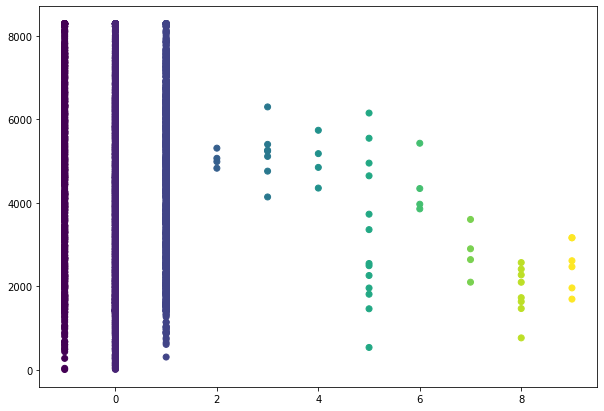

In [12]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clusters'],airline2['Days_since_enroll'], c=dbscan.labels_)

hierarchical cluster

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [16]:
airline=pd.read_csv('/content/EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [17]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [18]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [19]:
airline2_norm=pd.DataFrame(normalize(airline2),columns=airline2.columns)
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


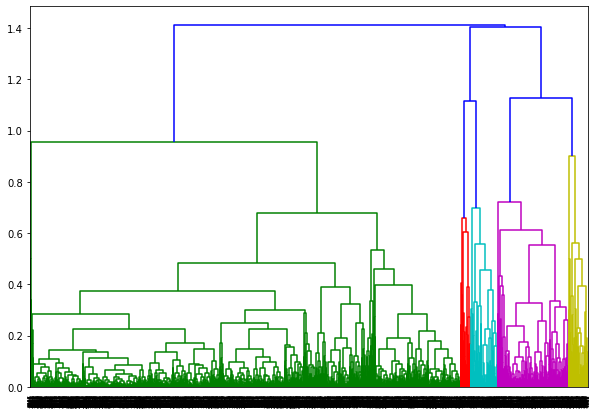

In [24]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm))

In [26]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
hclusters

AgglomerativeClustering(n_clusters=5)

In [27]:
y=pd.DataFrame(hclusters.fit_predict(airline2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

2    1547
4    1191
3     579
1     453
0     229
Name: clustersid, dtype: int64

In [28]:
# Adding clusters to dataset
airline2['clustersid']=hclusters.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [29]:
airline2.groupby('clustersid').agg(['mean']).reset_index()

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


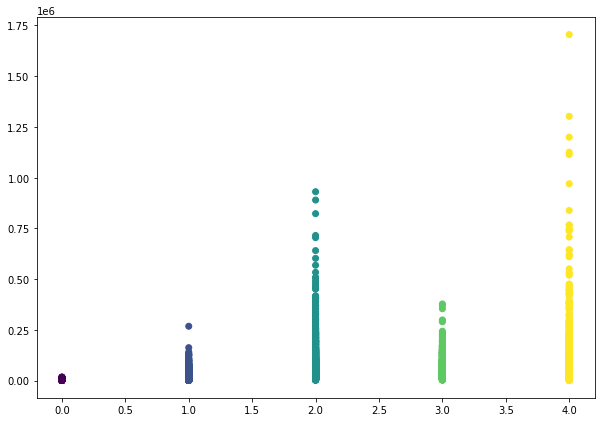

In [30]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clustersid'],airline2['Balance'], c=hclusters.labels_)

Kmeans Clustering

In [31]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [32]:
# Import Dataset
airline=pd.read_csv('/content/EastWestAirlines.csv')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [33]:
airline2=airline.drop(['ID#'],axis=1)
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [34]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [35]:
# Normalize heterogenous numerical data by using Standard Scaler
airline2_norm=StandardScaler().fit_transform(airline2)

In [36]:
# Use Elbow Graph to find optimum number of  clusters (K value) from K values range
# The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion WCSS 
# random state can be anything from 0 to 42, but the same number to be used everytime,so that the results don't change. 

In [37]:
# within-cluster sum-of-squares criterion 
wcss=[]
for i in range (1,11):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(airline2_norm)
    wcss.append(kmeans.inertia_)

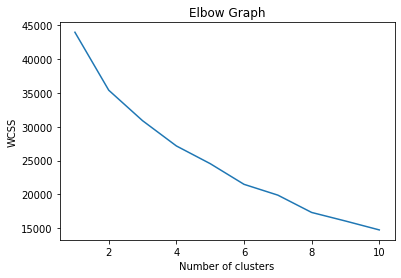

In [38]:
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [39]:
#Build Cluster algorithm using K=4

In [40]:
# Cluster algorithm using K=4
clusters4=KMeans(4,random_state=30).fit(airline2_norm)
clusters4

KMeans(n_clusters=4, random_state=30)

In [41]:
clusters4.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [42]:
# Assign clusters to the data set
airline4=airline2.copy()
airline4['clusters4id']=clusters4.labels_
airline4

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters4id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [43]:
# Compute the centroids for K=4 clusters with 11 variables
clusters4.cluster_centers_

array([[-0.29584258, -0.0603903 , -0.60911906,  0.03222463, -0.06075301,
        -0.51562007, -0.48778976, -0.18468409, -0.19727389, -0.2065444 ,
        -0.34933297],
       [ 0.63971926, -0.08443292,  1.0220844 , -0.09824189, 15.64629931,
         3.17969131,  1.71461374,  0.03329269,  0.05969539,  0.23987261,
         0.33752735],
       [ 1.19916278,  0.8413837 ,  0.07934291,  0.15576844, -0.06276658,
         0.61091878,  1.63802866,  3.57547132,  3.86140846,  0.28565421,
         0.91563614],
       [ 0.43059508,  0.0158422 ,  1.18872871, -0.08236624, -0.05476264,
         0.91116803,  0.74463543, -0.08026444, -0.09129375,  0.37198921,
         0.57588937]])

In [44]:
# Group data by Clusters (K=4)
airline4.groupby('clusters4id').agg(['mean']).reset_index()

,clusters4id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43828.396152,97.283863,1.223007,1.019238,1.000393,4707.805654,6.926973,201.254417,0.624656,3693.855124,0.201413
1,1,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
2,2,194432.643750,794.981250,2.168750,1.037500,1.000000,31897.281250,27.331250,5465.837500,16.018750,4708.400000,0.812500
3,3,117087.423649,156.736883,3.697729,1.002349,1.001566,39200.451057,18.761942,348.499608,1.029757,4885.918559,0.649961


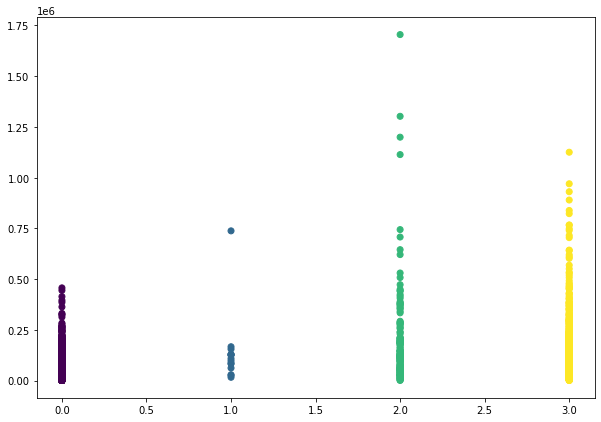

In [45]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline4['clusters4id'],airline4['Balance'], c=clusters4.labels_) 

In [46]:
#Build Cluster algorithm using K=5

In [47]:
# Cluster algorithm using K=5
clusters5=KMeans(5,random_state=30).fit(airline2_norm)
clusters5

KMeans(n_clusters=5, random_state=30)

In [48]:
clusters5.labels_

array([0, 0, 0, ..., 3, 0, 0], dtype=int32)

In [49]:
# Assign clusters to the data set
airline5=airline2.copy()
airline5['clusters5id']=clusters5.labels_
airline5

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusters5id
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [50]:
# Compute the centroids for K=5 clusters with 11 variables
clusters5.cluster_centers_

array([[-2.97441370e-01, -6.26013958e-02, -6.09944285e-01,
        -9.82418871e-02, -6.07159307e-02, -5.21330789e-01,
        -5.01454441e-01, -1.87180704e-01, -1.99831577e-01,
        -2.10475283e-01, -3.52420208e-01],
       [ 1.14970340e+00,  1.06407580e+00,  1.02900923e-01,
        -9.82418871e-02, -6.27665798e-02,  5.78252911e-01,
         1.52034538e+00,  3.44900129e+00,  3.66768718e+00,
         2.64756357e-01,  8.99553448e-01],
       [ 6.39719256e-01, -8.44329231e-02,  1.02208440e+00,
        -9.82418871e-02,  1.56462993e+01,  3.17969131e+00,
         1.71461374e+00,  3.32926913e-02,  5.96953922e-02,
         2.39872612e-01,  3.37527346e-01],
       [ 4.24748143e-01, -1.21396375e-02,  1.19282031e+00,
        -9.82418871e-02, -5.47249449e-02,  9.11488076e-01,
         7.40508649e-01, -9.38523027e-02, -1.02849450e-01,
         3.77190968e-01,  5.65958814e-01],
       [-4.68896637e-02, -1.56235600e-01, -6.68227273e-01,
         9.03825361e+00, -6.27665798e-02, -1.01665326e-01,
  

In [51]:
# Group data by Clusters (K=5)
airline5.groupby('clusters5id').agg(['mean']).reset_index()

,clusters5id,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,43669.876000,95.611600,1.221200,1.000000,1.000400,4568.151200,6.791600,197.838000,0.615200,3684.750400,0.200000
1,1,189448.964497,967.248521,2.201183,1.000000,1.000000,31108.467456,26.201183,5288.775148,15.284024,4665.248521,0.804734
2,2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333
3,3,116436.737421,134.935535,3.702830,1.000000,1.001572,39185.495283,18.721698,329.176101,0.985063,4897.754717,0.644654
4,4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


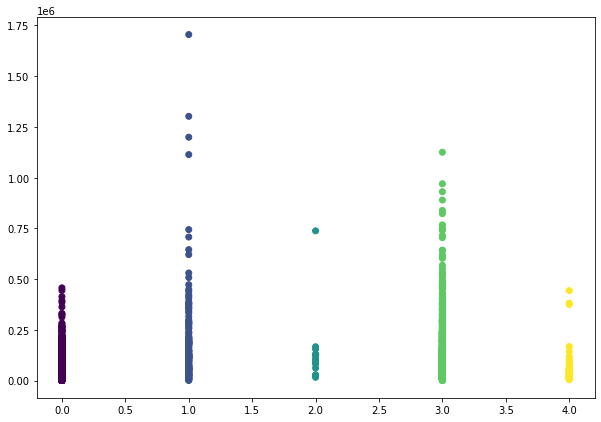

In [52]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline5['clusters5id'],airline5['Balance'], c=clusters5.labels_) 